<a href="https://colab.research.google.com/github/KUMARG0605/GENERATIVE_AI/blob/master/Artificial_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANN Implementation in python**

In [ ]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dataset =pd.read_csv('/content/archive (2).zip')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X=dataset.iloc[:,3:11]
Y=dataset.iloc[:,13]
#diving into the independent and dependent features

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard
0,619,France,Female,42,2,0.00,1,1
1,608,Spain,Female,41,1,83807.86,1,0
2,502,France,Female,42,8,159660.80,3,1
3,699,France,Female,39,1,0.00,2,0
4,850,Spain,Female,43,2,125510.82,1,1


In [ ]:
Y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
pd.get_dummies(X['Geography'])

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [ ]:
#feature engineering
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
geography

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [ ]:
X=X.drop(['Geography','Gender'],axis=1)


In [ ]:
X=pd.concat([X,gender,geography],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,Male,Germany,Spain
0,619,42,2,0.00,1,1,False,False,False
1,608,41,1,83807.86,1,0,False,False,True
2,502,42,8,159660.80,3,1,False,False,False
3,699,39,1,0.00,2,0,False,False,False
4,850,43,2,125510.82,1,1,False,False,True
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,True,False,False
9996,516,35,10,57369.61,1,1,True,False,False
9997,709,36,7,0.00,1,0,False,False,False
9998,772,42,3,75075.31,2,1,True,True,False


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train.shape
X.shape

(10000, 9)

In [ ]:
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
classifier=Sequential()
classifier.add(Dense(units=9,activation='relu'))
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
early_stop=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [ ]:
model_history=classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stop)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8488 - loss: 0.3647 - val_accuracy: 0.8425 - val_loss: 0.3763
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8541 - loss: 0.3490 - val_accuracy: 0.8432 - val_loss: 0.3752
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8461 - loss: 0.3587 - val_accuracy: 0.8440 - val_loss: 0.3755


In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

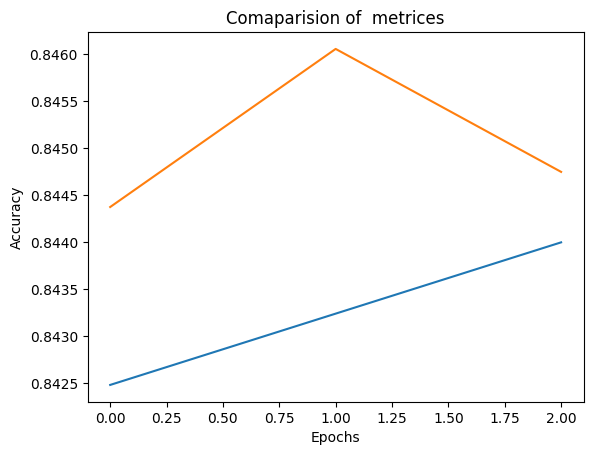

In [ ]:
plt.title("Comaparision of  metrices")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(model_history.history['val_accuracy'],label='train')
plt.plot(model_history.history['accuracy'],label='train')

plt.show()

In [ ]:
y=classifier.predict(X_test)
y=(y>=0.5)
y

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
c=confusion_matrix(Y_test,y)
a=accuracy_score(Y_test,y)
a


0.8385

In [ ]:
classifier.get_weights()

[array([[-0.40598094, -0.23607758,  0.2013656 ,  0.18574864,  0.18043569,
          0.01219322,  0.07979243, -0.13585651, -0.17450374],
        [-0.1741618 , -0.29881126, -0.14939895, -0.5776766 , -0.90449387,
          0.27435744, -0.134424  , -0.3834895 ,  0.7138629 ],
        [ 0.0427781 ,  0.21049348,  0.47185853, -0.14917988,  0.12797646,
         -0.22546458,  0.16809912,  0.28467378, -0.35821152],
        [ 0.3236908 ,  0.16081703, -0.00503407, -0.5059813 , -0.29120022,
          0.0156344 , -0.44932726, -0.00727176, -0.7258872 ],
        [-0.22269055,  0.80450696,  0.3822509 , -0.10924838, -0.17847899,
          1.1489067 , -1.0483261 , -0.12231718, -1.100313  ],
        [ 0.41301507, -0.2778537 , -0.09908844,  0.3276465 , -0.26948723,
          0.04737789, -0.26511914, -0.6069044 ,  0.05869065],
        [ 0.48520827,  0.5101281 , -0.31213334,  0.10539733, -0.13331662,
          0.0566371 , -0.089943  ,  0.55902445, -0.07403248],
        [-0.5454399 , -0.16994894,  0.24467136, 

**Single layer perceptron**

In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,ReLU,PReLU,ELU,Dropout


In [21]:
import numpy as np
class perceptron:
  def __init__(self,learning=0.05,epochs=100):
    self.lr=learning
    self.epochs=epochs
    self.weights=None
    self.bias=None

  def activation(self,z):
    return np.where(z<=0,0,1)

  def fit(self,X,y):
    n_samples,n_features=X.shape
    self.weights=np.zeros(n_features)
    self.bias=0

    for _ in range(self.epochs):
        for i in range(n_samples):
           z=np.dot(X[i],self.weights)+self.bias
           y_pred=self.activation(z)
           update=self.lr*(y[i]-y_pred)
           self.weights+=update*X[i]
           self.bias+=update

  def predict(self,X):
    z=np.dot(X,self.weights)+self.bias
    return self.activation(z)

inputs=np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
]
)
outputs=np.array([0,1,1,1])
p=perceptron(learning=0.1,epochs=10)
p.fit(inputs,outputs)
print("Weights:",p.weights)
print("Bias:",p.bias)
predictions=p.predict(inputs)
print("Predictions:",predictions)

Weights: [0.1 0.1]
Bias: 0.0
Predictions: [0 1 1 1]


In [13]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    # Step activation function
    def activation(self, z):
        return np.where(z >= 0, 1, 0)

    # Training function
    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights & bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Training loop
        for _ in range(self.epochs):
            for i in range(n_samples):
                linear_output = np.dot(X[i], self.weights) + self.bias
                y_pred = self.activation(linear_output)

                # Perceptron update rule
                update = self.lr * (y[i] - y_pred)
                self.weights += update * X[i]
                self.bias += update

    # Prediction
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation(linear_output)


In [15]:
# Inputs (x1, x2)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Targets
y = np.array([0, 0, 0, 1])
p = Perceptron(learning_rate=0.1, epochs=10)
p.fit(X, y)

print("Weights:", p.weights)
print("Bias:", p.bias)

predictions = p.predict(X)
print("Predictions:", predictions)


Weights: [0.2 0.1]
Bias: -0.20000000000000004
Predictions: [0 0 0 1]
